# Parábola

In [15]:
# import libraries
import numpy as np
import torch
import torch.nn as nn  # nn = neural network
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline


# import my own libraries
import sys
sys.path.append('../myUtils')
import rndData as myData
import text
import myGraph

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")  # set plot format to svg

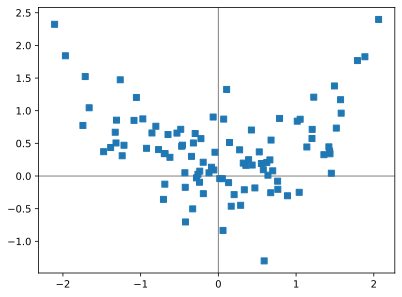

tensor([[ 0.0178],
        [ 0.1314],
        [ 1.4316],
        [-1.7132],
        [-0.4620],
        [-0.7696],
        [-0.8043],
        [-0.1953],
        [ 0.4700],
        [ 1.2070],
        [-1.3859],
        [ 0.7623],
        [-2.1071],
        [-0.2243],
        [ 0.3338],
        [-0.1204],
        [-0.3212],
        [-0.6856],
        [-0.6959],
        [ 0.2736],
        [ 0.6994],
        [ 0.4251],
        [ 0.2029],
        [-1.2377],
        [ 1.7896],
        [ 0.0686],
        [-1.3110],
        [ 0.6379],
        [ 0.5262],
        [ 0.0599],
        [-0.2426],
        [-0.4228],
        [-0.4841],
        [-0.2986],
        [ 1.8856],
        [ 1.0150],
        [-1.2626],
        [ 0.7649],
        [ 1.2046],
        [-0.6479],
        [ 1.0525],
        [ 1.4222],
        [ 0.7872],
        [-0.0890],
        [ 0.6779],
        [-1.0856],
        [-0.3304],
        [ 1.5178],
        [-0.8546],
        [ 0.6631],
        [ 1.3579],
        [-1.7431],
        [-0.

In [16]:
# create data

from sympy import true

N = 100
x = torch.randn(N, 1)
y = x**2/2 + torch.randn(N, 1) / 2

myGraph.showAxes(plt)

# and plot
plt.plot(x, y, "s")

plt.show()

x

In [17]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 2),  # input layer: 1 input feature, 1 output feature, bias = True (default)
    nn.ReLU(),
    nn.Linear(2, 1),  # output layer: 1 input feature, 1 output feature, bias = True (default) 
    nn.ReLU()
)

ANNParams = ANNreg.parameters()

# text.box('INITIAL WEIGHTS AND BIASES', charset='=')

# text.box('LAYER 1: ')
# print(ANNreg[0].weight)  # weight of first layer
# print(ANNreg[0].bias)  # bias of first layer

# text.box('ACTIVATION FUNCTION')
# print(ANNreg[1])  # activation function

# text.box('LAYER 2: ')
# print(ANNreg[2].weight)  # weight of second layer
# print(ANNreg[2].bias)  # bias of second layer

In [18]:
# learning rate
learningRate = 0.05

# loss function
lossfun = nn.MSELoss() # mean squared error loss

params = ANNreg.parameters() # parameters to optimize: weights and bias

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(params, lr=learningRate)

In [19]:
# train the model
num_epochs = 500
losses = torch.zeros(num_epochs)

print(f'x.shape = {x.shape}')

## Train the model!
for epoch_i in range(num_epochs):
    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat, y)
    losses[epoch_i] = loss

    # backprop. The gradient is calculated with respect to the parameters. To do this, we need to call loss.backward() and then optimizer.step().
    optimizer.zero_grad() # zero out gradients (otherwise they are accumulated)
    loss.backward() # compute gradients via backprop (chain rule). Gradients are stored in the .grad attribute of each parameter. 
    optimizer.step() # take a step in the direction of the negative gradient


x.shape = torch.Size([100, 1])


In [20]:
text.box('FINAL WEIGHTS AND BIASES', charset='=')

text.box('LAYER 1: ')
print(ANNreg[0].weight)  # weight of first layer
print(ANNreg[0].bias)  # bias of first layer

text.box('ACTIVATION FUNCTION')
print(ANNreg[1])  # activation function

text.box('LAYER 2: ')
print(ANNreg[2].weight)  # weight of second layer
print(ANNreg[2].bias)  # bias of second layer

╔══════════════════════════════════════════════════════════╗
║                 FINAL WEIGHTS AND BIASES                 ║
╚══════════════════════════════════════════════════════════╝
┌──────────────────────────────────────────────────────────┐
│                        LAYER 1:                          │
└──────────────────────────────────────────────────────────┘
Parameter containing:
tensor([[ 0.8853],
        [-1.0622]], requires_grad=True)
Parameter containing:
tensor([-0.0407, -0.1129], requires_grad=True)
┌──────────────────────────────────────────────────────────┐
│                   ACTIVATION FUNCTION                    │
└──────────────────────────────────────────────────────────┘
ReLU()
┌──────────────────────────────────────────────────────────┐
│                        LAYER 2:                          │
└──────────────────────────────────────────────────────────┘
Parameter containing:
tensor([[0.8259, 0.8493]], requires_grad=True)
Parameter containing:
tensor([-0.2073], re

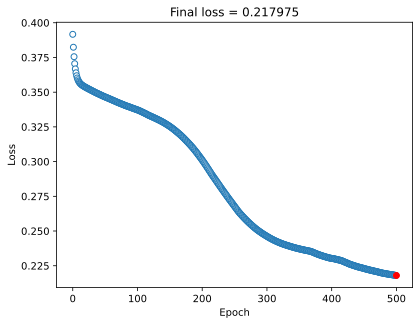

In [21]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(num_epochs, testloss.detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final loss = %g" % testloss.item())
plt.show()

In [22]:
testloss.item()

0.21797536313533783

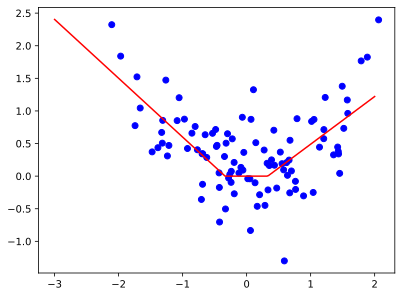

In [23]:

ls = np.linspace(-3, 2, 200)
lsr = ls.reshape(200,1)
x1 = torch.Tensor(lsr)

Y1 = ANNreg(x1)

# plot the data
plt.plot(x, y, "bo", label="Real data")
# plt.plot(x, predictions.detach(), "rs", label="Predictions")
plt.plot(x1, Y1.detach(), 'r-')


In [24]:

pred = ANNreg(torch.Tensor(data).float())
plt.plot(data, pred.detach(), "rs")
plt.title(f"prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}")
plt.legend()
plt.show()

NameError: name 'data' is not defined

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.